# Peng Jin

## Research Questions
- Do teams that do well in offense also do well in defense?
- Does the prediction match the team players' real capability score?
- Which team's players have better performance in playoff season than expectation?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Task 1

In [2]:
df = pd.read_csv("../data/raw/latest_RAPTOR_by_team.csv")
print("Number of rows and columns respectively:", df.shape)
print(df.head())
print("Columns:", df.columns)

Number of rows and columns respectively: (865, 23)
        player_name  player_id  season season_type team  poss    mp  \
0  Precious Achiuwa  achiupr01    2021          PO  MIA    24    12   
1  Precious Achiuwa  achiupr01    2021          RS  MIA  1557   737   
2      Jaylen Adams  adamsja01    2021          RS  MIL    41    18   
3      Steven Adams  adamsst01    2021          RS  NOP  3313  1605   
4       Bam Adebayo  adebaba01    2021          PO  MIA   293   136   

   raptor_box_offense  raptor_box_defense  raptor_box_total  ...  \
0          -20.130150           13.445869         -6.684281  ...   
1           -3.876227            1.172972         -2.703254  ...   
2          -13.078112           -3.298021        -16.376133  ...   
3           -1.463698            2.084763          0.621065  ...   
4           -4.199527           -0.745652         -4.945179  ...   

   raptor_offense  raptor_defense  raptor_total  war_total  war_reg_season  \
0      -19.524216       16.885365  

In [3]:
df.nunique(axis=0)

player_name             540
player_id               540
season                    1
season_type               2
team                     30
poss                    721
mp                      621
raptor_box_offense      865
raptor_box_defense      865
raptor_box_total        865
raptor_onoff_offense    864
raptor_onoff_defense    865
raptor_onoff_total      865
raptor_offense          865
raptor_defense          865
raptor_total            865
war_total               865
war_reg_season          627
war_playoffs            240
predator_offense        865
predator_defense        865
predator_total          865
pace_impact             865
dtype: int64

In [4]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
raptor_box_offense,865.0,-1.190280,5.029161,-46.708724,-2.690118,-0.878361,1.052860,25.867967
raptor_box_defense,865.0,-0.452295,5.073575,-25.382776,-2.244035,-0.334633,1.589149,66.957703
raptor_box_total,865.0,-1.642575,7.526838,-62.219863,-4.002939,-0.802503,1.754482,67.932330
raptor_onoff_offense,865.0,-2.544279,8.402711,-69.051553,-5.120859,-1.362247,1.629285,28.120957
raptor_onoff_defense,865.0,1.036961,8.677396,-52.889719,-2.148888,0.351031,3.185249,65.729833
raptor_onoff_total,865.0,-1.507318,10.583814,-88.047853,-5.202733,-0.874476,2.719564,55.960874
raptor_offense,865.0,-1.553084,5.329365,-43.366145,-3.123756,-0.982071,0.925080,22.564146
raptor_defense,865.0,-0.165898,5.397463,-30.938383,-2.091871,-0.131748,1.899592,71.024801
raptor_total,865.0,-1.718982,7.758748,-63.749646,-4.267638,-0.947591,1.790902,68.268286
war_total,865.0,0.963499,1.963746,-4.747338,-0.085045,0.219487,1.480337,15.756031


In [5]:
df.team.unique()

array(['MIA', 'MIL', 'NOP', 'SAS', 'BRK', 'PHO', 'MEM', 'CLE', 'CHI',
       'ORL', 'LAL', 'POR', 'TOR', 'HOU', 'WAS', 'UTA', 'SAC', 'CHA',
       'NYK', 'DEN', 'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND',
       'ATL', 'PHI', 'BOS'], dtype=object)

## Task 2-3

In [6]:
import project_functions3 as fun

In [7]:
df=fun.load_and_process("../data/raw/latest_RAPTOR_by_team.csv")
df

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Aaron Gordon,gordoaa01,2021,RS,ORL,1528,736,-0.932025,1.821116,0.889091,...,-0.463134,2.022046,1.558912,1.619684,1.619684,0.000000,-0.926717,0.521009,-0.405708,0.103369
1,Aaron Gordon,gordoaa01,2021,PO,DEN,620,299,-2.258470,0.326547,-1.931923,...,-1.681302,0.391789,-1.289513,0.231974,0.000000,0.231974,-3.714343,0.583292,-3.131051,0.934664
2,Aaron Gordon,gordoaa01,2021,RS,DEN,1341,648,-0.823652,0.246942,-0.576710,...,-0.408308,0.140385,-0.267922,0.821301,0.821301,0.000000,0.162278,-0.118989,0.043289,0.086371
3,Aaron Holiday,holidaa01,2021,RS,IND,2556,1176,-1.560030,-0.663993,-2.224023,...,-1.387776,-0.852356,-2.240132,0.308333,0.308333,0.000000,-1.610154,-1.081808,-2.691962,0.797174
4,Aaron Nesmith,nesmiaa01,2021,PO,BOS,152,75,-5.315048,2.808603,-2.506446,...,-5.209148,5.340436,0.131289,0.112559,0.000000,0.112559,-4.918039,4.454293,-0.463746,-0.992661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Yuta Watanabe,watanyu01,2021,RS,TOR,1533,723,-0.902317,0.174625,-0.727692,...,-1.341235,0.157521,-1.183714,0.576515,0.576515,0.000000,-1.820152,-0.015584,-1.835736,-0.218032
861,Zach LaVine,lavinza01,2021,RS,CHI,4294,2034,3.816001,-1.371998,2.444002,...,3.929600,-1.613702,2.315898,5.321058,5.321058,0.000000,4.312378,-1.690984,2.621393,1.228100
862,Zeke Nnaji,nnajize01,2021,RS,DEN,848,397,-1.475450,-3.091979,-4.567428,...,-2.735651,-2.841045,-5.576696,-0.570573,-0.570573,0.000000,-2.412525,-3.439129,-5.851654,-0.347973
863,Zeke Nnaji,nnajize01,2021,PO,DEN,39,18,10.431325,-7.287116,3.144209,...,7.616831,-2.340404,5.276427,0.076935,0.000000,0.076935,3.733035,-2.386622,1.346412,1.177056


## Task 4

### Research Question 1: Do players that do well in offense also do well in defense?

#### Analysis

The following graph shows the generally negative or close to zero correlation between the individual player's offense and defense, in both onoff and box.
It also shows that the player's box offense and defense capability has a large correlation with their total rating on offense and defense.

<AxesSubplot:>

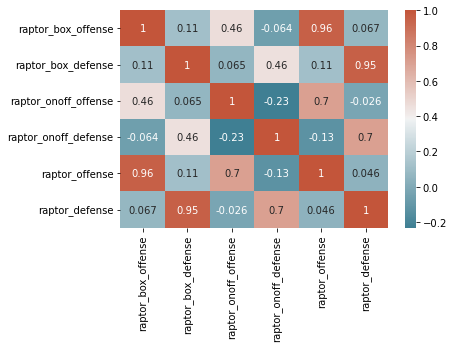

In [8]:
df1= df.loc[0:,['raptor_box_offense', 'raptor_box_defense', 'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_offense', 'raptor_defense']]
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Research Question 2: Does the prediction match the team players' real capability score?

#### Analysis

The following graph shows that most teams have negative predictive points in total. But teams MEM and CHI are given high expectation.

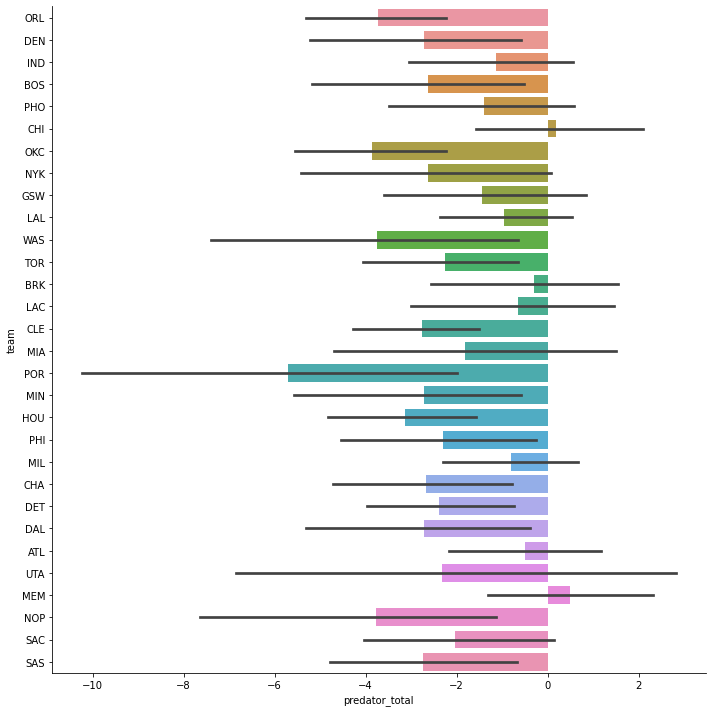

In [9]:
#df.plot(kind="scatter", x="team", y="predator_total")
sns.catplot(x="predator_total",y="team",data = df,kind ="bar",height=10)

#### Analysis

The following graph shows that the team CHI gains the highest total points, which indicates that CHI's competitiveness. By comparing Graph Analysis 2 with Graph Analysis 3, we find that prediction basically match the real capabilities of different teams in total values.

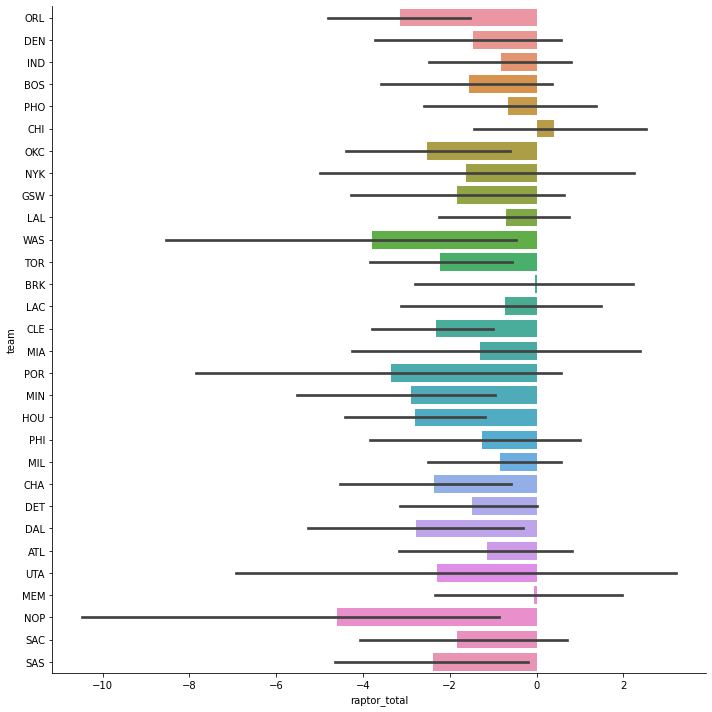

In [10]:
sns.catplot(x="raptor_total",y="team",data = df,kind ="bar",height=10)

#### Analysis

After discovering that the total prediction points match the total capabilities points, we further research whether the compenents of the capability, offense and defense, also match the prediction.\
Based on the following graph, I find that there's strong positive correlations between raptor_offense and predator_offense, between raptor_defense and predator_defense in both regular season and playoff season. This demonstrates that the prediction is highly accurate and reliable.

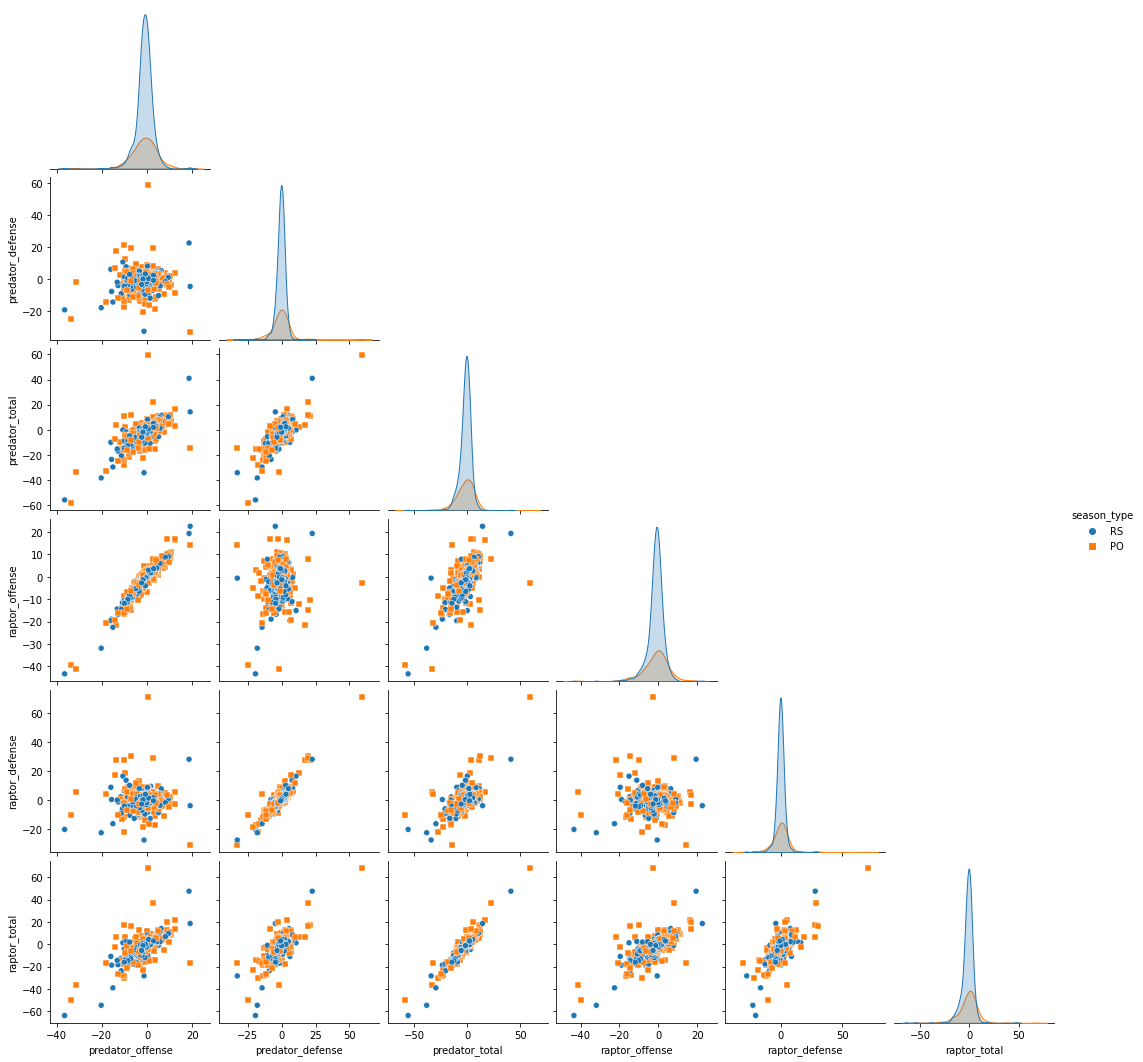

In [11]:
sns.pairplot(df,x_vars=["predator_offense","predator_defense","predator_total","raptor_offense","raptor_defense","raptor_total"],y_vars=["predator_offense","predator_defense","predator_total","raptor_offense","raptor_defense","raptor_total"],corner=True, hue="season_type", markers=["o","s"])

### Research Question 3: Which team's players have better performance in playoff season than expectation?

#### Analysis

To answer this research question, I frist create the column "Performance Stability". This column is calculated by ("raptor_total" minus "predator_total"). Then I create the df1 that only has players entering the playoff season. Hence, the following graph shows the comparison of playoff players' performance in different teams with their individual expectations.\
The plot shows that the team POR players performs much better than predictions on average. Several other teams such as DEN, BOS and UTA are also better than expectation, despite less than POR.

[Text(0.5, 0, 'Performance Stability'),
 Text(0, 0.5, 'team'),
 Text(0.5, 1.0, 'Player Playoff vs Regular Season Performance by teams')]

<Figure size 1008x648 with 0 Axes>

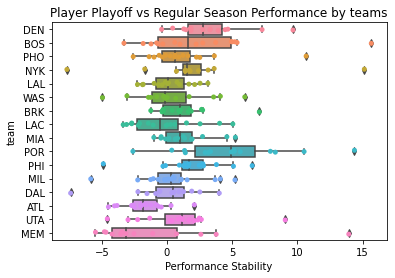

In [12]:
df["Performance Stability"]=df["raptor_total"]-df["predator_total"]
df1 = df.loc[df["season_type"] == "PO"]
plt.figure(figsize=(14,9))
fig, ax = plt.subplots()
sns.boxplot(x="Performance Stability",y="team",data=df1, ax=ax)
sns.stripplot(x="Performance Stability",y="team",data=df1, jitter=True, dodge=True,ax=ax).set(xlabel="Performance Stability", ylabel= "team", title="Player Playoff vs Regular Season Performance by teams")

#### Analysis

In addition, some teams such as BOS, NYK, POR and MEM have highly positive outliers, which implies that they have really surprising players who break out in playoff season. These players like Tacko Fall and Kevin Knox II are worth further development.

In [13]:
df2 = df1.sort_values(by="Performance Stability", ascending=False)
df2[["player_name","Performance Stability"]]

,player_name,Performance Stability
763,Tacko Fall,15.673050
490,Kevin Knox II,15.139858
758,T.J. Leaf,14.381907
457,Justise Winslow,13.947636
816,Ty-Shon Alexander,10.674374
...,...,...
19,Alex Len,-4.954603
855,Xavier Tillman,-5.487901
549,Mamadi Diakite,-5.851987
629,Nicolo Melli,-7.397574


### Conclusions on Graph Analysis

The graphs show that few players can do a good job in both offense and defense. The predictions on players' performance are quite accurate and reliable in total, close to the real data. However, there are still several teams and players who perform much better than expectation. These teams and players are worth long-term attention and development. They might be candidates for the future champion and MVP.